<a href="https://colab.research.google.com/github/dany-tomlinson28/UNIDAD.4/blob/main/PROBLEMARIO_U4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

In [ ]:
import pandas as pd
from io import StringIO


1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.
datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# De aquí en adelante, ya se lo dejo a ustedes.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['metodo'] == 'A']['tiempo'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'B']['tiempo'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'C']['tiempo'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'D']['tiempo'], "Grupo D", nivel_de_significancia)



Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.8634
Valor p: 0.2725
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.8481
Valor p: 0.2200
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.


In [ ]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05
#Daniela Montserrat Robledo Ruvalcaba
# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['metodo'] == 'A']['tiempo'],
    df[df['metodo'] == 'B']['tiempo'],
    df[df['metodo'] == 'C']['tiempo'],
    df[df['metodo'] == 'D']['tiempo']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 2.485339763933269
Valor p: 0.4779463433898813
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


Se puede observar que existe independencia entre las variables, ya que se observa que el método utilizado no afecta el tiempo de ensamble. Tampoco se logran identificar patrones que indiquen que un método de ensamble requiera más o menos tiempo que algún otro, pues todos los tiempos registrados en la tabla se encuentran en un rango de 6 a 16 minutos.

In [ ]:
import scipy.stats as stats

nivel_de_significancia = 0.05
#Daniela Montserrat Robledo Ruvalcaba
# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['metodo'] == 'A']['tiempo'],
    df[df['metodo'] == 'B']['tiempo'],
    df[df['metodo'] == 'C']['tiempo'],
    df[df['metodo'] == 'D']['tiempo']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 9.42
Valor p: 0.00177

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

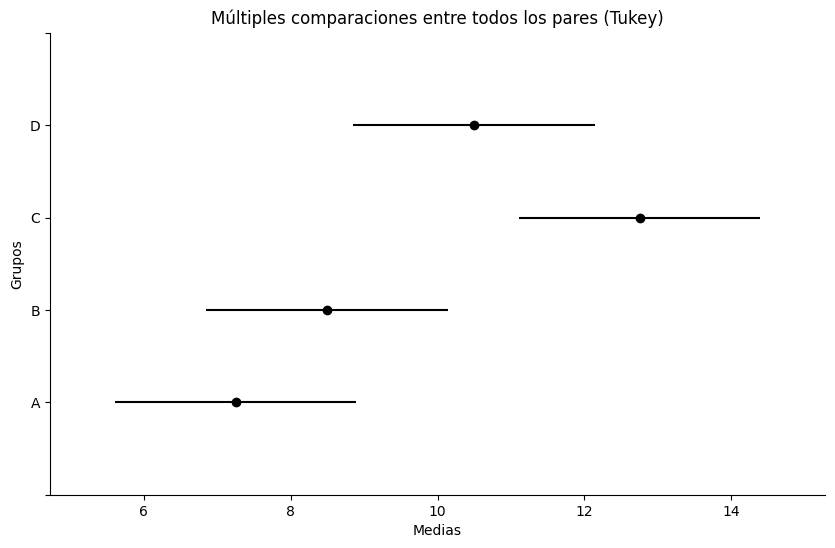

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Después de analizar el diseño experimental, se logran realizar las pruebas necesarias, obteniendo como resultado que el diseño sí cuenta con homocedasticidad, normalidad e independencia.  

Sin embargo, la prueba ANOVA indica que existe una diferencia significativa en al menos dos métodos. Después de realizar la prueba de Tukey, se logra observar que el método "C" tiene una diferencia significativa al compararlo con los demás métodos. Por ello, se recomienda no utilizar el método ya mencionado, pues, como se observa en la gráfica obtenida, el método "C" requiere más tiempo, lo que provoca que la producción se retrase y exista un déficit de rendimiento.  

Por otro lado, el método "A" es el más recomendado, ya que este requiere mucho menos tiempo que los otros tres, lo que incrementa la eficiencia y la eficacia.

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.
datos = '''
Tipo de cuero, Desgaste
A,264
A,260
A,258
A,241
A,262
A,255
B,208
B,220
B,216
B,200
B,213
B,206
C,220
C,263
C,219
C,225
C,230
C,228
D,217
D,226
D,215
D,227
D,220
D,222
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.strip()

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Tipo de cuero'] == 'A']['Desgaste'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Tipo de cuero'] == 'B']['Desgaste'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Tipo de cuero'] == 'C']['Desgaste'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Tipo de cuero'] == 'D']['Desgaste'], "Grupo D", nivel_de_significancia)



Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.8348
Valor p: 0.1180
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9847
Valor p: 0.9723
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.7369
Valor p: 0.0148
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9453
Valor p: 0.7017
Interpretación: Los datos tienen una distribución normal.


Se logra confirmar que sí existe independencia entre los cuatro tipos de cuero y los miligramos de peso perdidos (desgaste), ya que se descarta que al probar algún tipo de cuero y, después, otro, el primero afecte el desgaste del segundo.

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Si al menos un grupo no sigue una distribución normal
from scipy.stats import kruskal

# Prueba de Kruskal-Wallis
kruskal_result = kruskal(
    df[df['Tipo de cuero'] == 'A']['Desgaste'],
    df[df['Tipo de cuero'] == 'B']['Desgaste'],
    df[df['Tipo de cuero'] == 'C']['Desgaste'],
    df[df['Tipo de cuero'] == 'D']['Desgaste'],

)

# Mostrar resultados
print("Resultados de la prueba de Kruskal-Wallis:")
print(f"Estadístico de prueba: {kruskal_result.statistic:.2f}")
print(f"Valor p: {kruskal_result.pvalue:}")

# Interpretación
if kruskal_result.pvalue < 0.05:
    print("\nInterpretación: Existen diferencias significativas entre al menos dos grupos.")
else:
    print("\nInterpretación: No hay diferencias significativas entre los grupos.")


Resultados de la prueba de Kruskal-Wallis:
Estadístico de prueba: 17.00
Valor p: 0.0007080068299849023

Interpretación: Existen diferencias significativas entre al menos dos grupos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B -46.1667    0.0  -62.553 -29.7803   True
     A      C -25.8333 0.0014 -42.2197   -9.447   True
     A      D    -35.5    0.0 -51.8863 -19.1137   True
     B      C  20.3333 0.0118    3.947  36.7197   True
     B      D  10.6667 0.2926  -5.7197   27.053  False
     C      D  -9.6667 0.3743  -26.053   6.7197  False
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

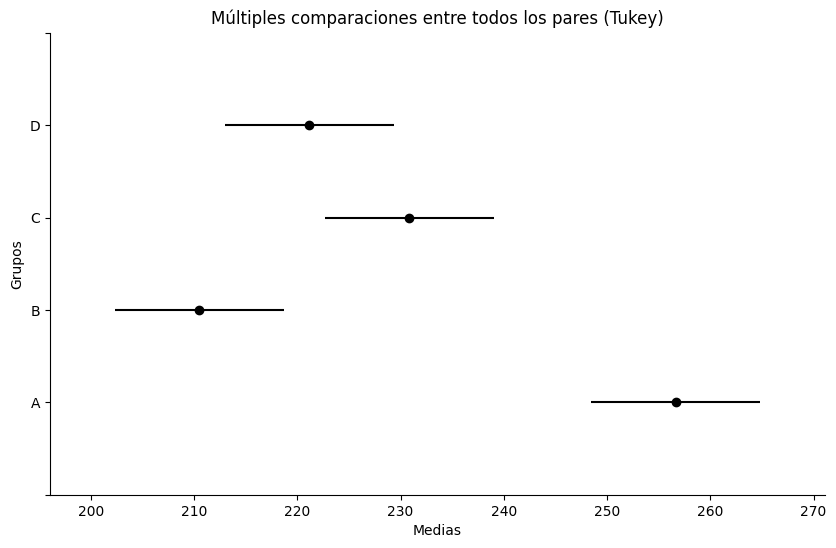

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Desgaste'], groups=df['Tipo de cuero'], alpha=nivel_de_significancia)


# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

En el análisis realizado con la prueba de homocedasticidad, se indica que al menos una variable no cumple con este supuesto. Por ello, se omite realizar la prueba de Bartlett y, en lugar de ANOVA, se utiliza la prueba de Kruskal-Wallis. Dicha prueba arroja como resultado que al menos dos grupos presentan diferencias significativas.  

Como siguiente paso, la prueba de Tukey señala que el tipo de cuero "A" es el que provoca que los datos sean diferentes, ya que, según esta prueba, el grupo "A" es el que presenta mayor desgaste en comparación con los otros tres tipos. Por ello, se recomienda dejar de utilizar dicho cuero para la fabricación de los zapatos, ya que, al desgastarse más rápido, podría generar una disminución en la calidad del producto.


3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$ | $T_4$ |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
|214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.
datos = '''
Tratamiento,Minutos
T_1,213
T_1,214
T_1,204
T_1,208
T_1,212
T_1,200
T_1,207
T_2,76
T_2,85
T_2,74
T_2,78
T_2,82
T_2,75
T_2,82
T_3,57
T_3,67
T_3,55
T_3,64
T_3,61
T_3,63
T_3,63
T_4,84
T_4,82
T_4,85
T_4,92
T_4,87
T_4,79
T_4,90
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.strip()
df

,Tratamiento,Minutos
0,T_1,213
1,T_1,214
2,T_1,204
3,T_1,208
4,T_1,212
5,T_1,200
6,T_1,207
7,T_2,76
8,T_2,85
9,T_2,74


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Tratamiento'] == 'T_1']['Minutos'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'T_2']['Minutos'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'T_3']['Minutos'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'T_4']['Minutos'], "Grupo D", nivel_de_significancia)



Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9387
Valor p: 0.6269
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9200
Valor p: 0.4697
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9413
Valor p: 0.6506
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9847
Valor p: 0.9793
Interpretación: Los datos tienen una distribución normal.


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Tratamiento'] == 'T_1']['Minutos'],
    df[df['Tratamiento'] == 'T_2']['Minutos'],
    df[df['Tratamiento'] == 'T_3']['Minutos'],
    df[df['Tratamiento'] == 'T_4']['Minutos']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 0.33019728661304565
Valor p: 0.9542526447837091
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


Se acepta que existe independencia entre los cuatro tipos de tratamiento y el tiempo de cocción. Es decir, si se utiliza el tratamiento uno, este no afectará el tiempo de cocción de los tratamientos 2, 3 y 4.

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['Tratamiento'] == 'T_1']['Minutos'],
    df[df['Tratamiento'] == 'T_2']['Minutos'],
    df[df['Tratamiento'] == 'T_3']['Minutos'],
    df[df['Tratamiento'] == 'T_4']['Minutos']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 1558.97
Valor p: 1.260639680401337e-27

Conclusión: Hay diferencias significativas entre al menos dos grupos.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   T_1    T_2 -129.4286    0.0 -136.0757 -122.7815   True
   T_1    T_3 -146.8571    0.0 -153.5043   -140.21   True
   T_1    T_4 -122.7143    0.0 -129.3614 -116.0672   True
   T_2    T_3  -17.4286    0.0  -24.0757  -10.7815   True
   T_2    T_4    6.7143 0.0471    0.0672   13.3614   True
   T_3    T_4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

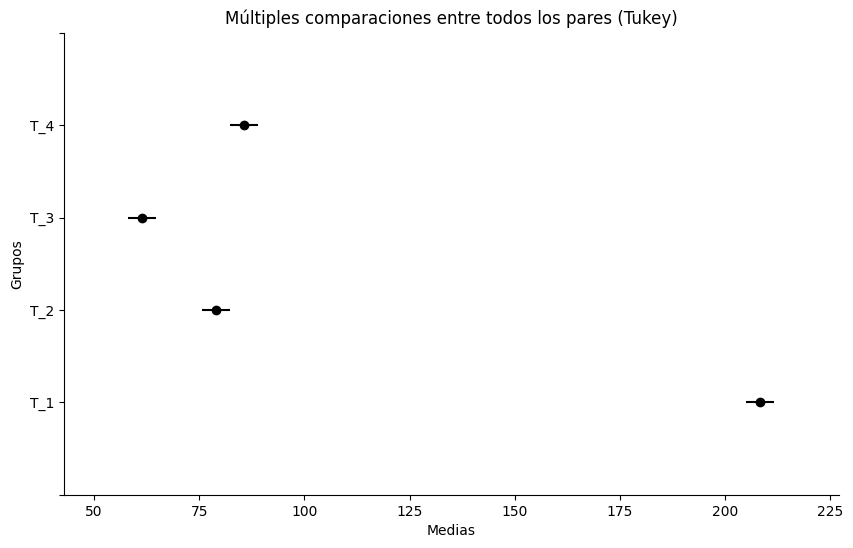

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Minutos'], groups=df['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Después de realizar pruebas y que el modelo cumpliera con homosedasticidad, normalidad e independencia, la prueba ANOVA arrojó que existe una diferencia entre al menos dos grupos. Para después confirmar dicho resultado con la prueba Tukey, pues, aunque la tabla indica que todos los tratamientos tienen diferencia significativa, en el gráfico se muestra que el tratamiento 1 requiere de más minutos de cocción y el tratamiento 3 logra que los frijoles tengan una cocción más rápida.  

Así que se recomienda sí utilizar un tratamiento y si se busca que el tiempo de cocción sea menor, dejarlos reposar con sal común.

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.
datos = '''
Temperatura,Intensidad
20°C,15
20°C,18
20°C,13
20°C,12
40°C,17
40°C,21
40°C,11
40°C,16
60°C,23
60°C,19
60°C,25
60°C,22
80°C,45
80°C,51
80°C,57
80°C,48

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.strip()
df

,Temperatura,Intensidad
0,20°C,15
1,20°C,18
2,20°C,13
3,20°C,12
4,40°C,17
5,40°C,21
6,40°C,11
7,40°C,16
8,60°C,23
9,60°C,19


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Temperatura'] == '20°C']['Intensidad'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '40°C']['Intensidad'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '60°C']['Intensidad'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '80°C']['Intensidad'], "Grupo D", nivel_de_significancia)



Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9456
Valor p: 0.6889
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9763
Valor p: 0.8800
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9815
Valor p: 0.9109
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9714
Valor p: 0.8500
Interpretación: Los datos tienen una distribución normal.


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Temperatura'] == '20°C']['Intensidad'],
    df[df['Temperatura'] == '40°C']['Intensidad'],
    df[df['Temperatura'] == '60°C']['Intensidad'],
    df[df['Temperatura'] == '80°C']['Intensidad']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 1.873995234820225
Valor p: 0.5989666017036206
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


Se acepta la existencia de independencia entre las variables, ya que, si aplicamos (por ejemplo) 20°C, obtenemos cierto número de intensidad de corriente, y al aplicar 40°C, esto no afecta la intensidad ya obtenida o la que se va a obtener.

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['Temperatura'] == '20°C']['Intensidad'],
    df[df['Temperatura'] == '40°C']['Intensidad'],
    df[df['Temperatura'] == '60°C']['Intensidad'],
    df[df['Temperatura'] == '80°C']['Intensidad']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 78.40
Valor p: 3.7575528552091966e-08

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  20°C   40°C     1.75 0.9104 -6.1341  9.6341  False
  20°C   60°C     7.75 0.0545 -0.1341 15.6341  False
  20°C   80°C    35.75    0.0 27.8659 43.6341   True
  40°C   60°C      6.0 0.1626 -1.8841 13.8841  False
  40°C   80°C     34.0    0.0 26.1159 41.8841   True
  60°C   80°C     28.0    0.0 20.1159 35.8841   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

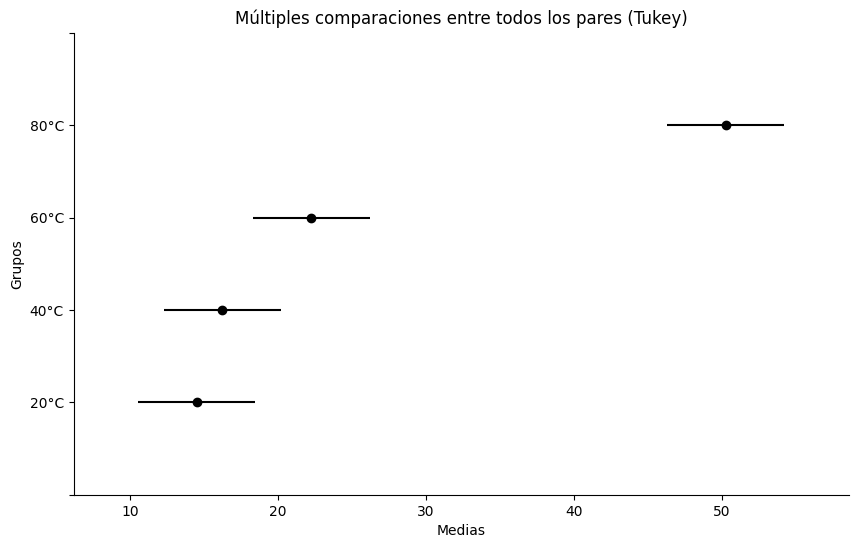

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Intensidad'], groups=df['Temperatura'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Las pruebas realizadas dieron como resultado que sí existe homocedasticidad, normalidad e independencia. Sin embargo, la prueba ANOVA nos comunica una diferencia significativa entre al menos dos variables, por lo que se vuelve necesario utilizar Tukey.

La prueba Tukey muestra que, al aplicar 80°C, la intensidad de corriente es mayor, por lo cual el deterioro también será mayor. Es por eso que se recomienda utilizar un rango de 20°C a 60°C en la realización de la prueba.

5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.
datos = '''
Tratamiento,Porcentaje
Con,5.3
Con,4.0
Con,4.0
Con,4.0
Con,2.6
Con,2.1
Con,5.1
Con,4.1
Con,4.1
Con,3.2
Con,5.1
Con,2.2
Con,4.1
Sin,8.0
Sin,13.2
Sin,7.2
Sin,8.2
Sin,9.1
Sin,6.7
Sin,12.6
Sin,16.3
Sin,9.2
Sin,6.4
Sin,7.2
Sin,17.2
Sin,12.3

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.strip()
df

,Tratamiento,Porcentaje
0,Con,5.3
1,Con,4.0
2,Con,4.0
3,Con,4.0
4,Con,2.6
5,Con,2.1
6,Con,5.1
7,Con,4.1
8,Con,4.1
9,Con,3.2


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Tratamiento'] == 'Con']['Porcentaje'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'Sin']['Porcentaje'], "Grupo B", nivel_de_significancia)



Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.8991
Valor p: 0.1299
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.8757
Valor p: 0.0624
Interpretación: Los datos tienen una distribución normal.


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Tratamiento'] == 'Con']['Porcentaje'],
    df[df['Tratamiento'] == 'Sin']['Porcentaje'],

)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 14.624218793568684
Valor p: 0.0001312173560465191
Rechazamos la hipótesis nula: Las varianzas no son iguales.


Se observa independencia entre la producción que cuenta con el tratamiento de mejora y con el que no cuenta con este, ya que la producción realizada con el tratamiento no afecta el porcentaje de piezas defectuosas de la producción realizada sin el tratamiento y viceversa.

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Si al menos un grupo no sigue una distribución normal
from scipy.stats import kruskal

# Prueba de Kruskal-Wallis
kruskal_result = kruskal(
  df[df['Tratamiento'] == 'Con']['Porcentaje'],
  df[df['Tratamiento'] == 'Sin']['Porcentaje'],

)

# Mostrar resultados
print("Resultados de la prueba de Kruskal-Wallis:")
print(f"Estadístico de prueba: {kruskal_result.statistic:.2f}")
print(f"Valor p: {kruskal_result.pvalue:.7f}")

# Interpretación
if kruskal_result.pvalue < 0.05:
    print("\nInterpretación: Existen diferencias significativas entre al menos dos grupos.")
else:
    print("\nInterpretación: No hay diferencias significativas entre los grupos.")


Resultados de la prueba de Kruskal-Wallis:
Estadístico de prueba: 18.84
Valor p: 0.0000142

Interpretación: Existen diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
   Con    Sin   6.4385   0.0 4.2569  8.62   True
------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

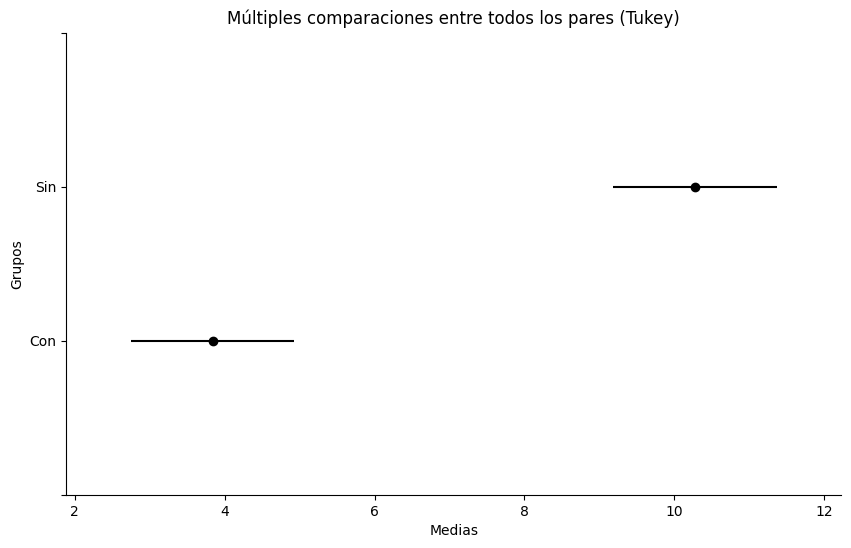

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Porcentaje'], groups=df['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Al confirmar que el diseño cuenta con homocedasticidad, normalidad e independencia, la prueba de ANOVA indica que hay una diferencia significativa entre la producción realizada con el tratamiento de mejora y con la producción que no se realizó con este tratamiento, lo que se termina de confirmar con la tabla y el gráfico de la prueba Tukey. Al analizarlo, se logró comprender que la mejor opción es sí utilizar el tratamiento de mejora, ya que los productos realizados con este muestran un porcentaje menor de defectos.

6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.
datos = '''
Porcentaje,Dureza
dos,4.3
dos,5.2
dos,4.8
dos,4.5
cinco,6.5
cinco,7.3
cinco,6.9
cinco,6.1
diez,9.0
diez,7.8
diez,8.5
diez,8.1
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.strip()
df

,Porcentaje,Dureza
0,dos,4.3
1,dos,5.2
2,dos,4.8
3,dos,4.5
4,cinco,6.5
5,cinco,7.3
6,cinco,6.9
7,cinco,6.1
8,diez,9.0
9,diez,7.8


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Porcentaje'] == 'dos']['Dureza'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Porcentaje'] == 'cinco']['Dureza'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Porcentaje'] == 'diez']['Dureza'], "Grupo C", nivel_de_significancia)




Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9713
Valor p: 0.8497
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9807
Valor p: 0.9058
Interpretación: Los datos tienen una distribución normal.


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Porcentaje'] == 'dos']['Dureza'],
    df[df['Porcentaje'] == 'cinco']['Dureza'],
    df[df['Porcentaje'] == 'diez']['Dureza'],

)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 0.25398027627307607
Valor p: 0.8807423583152111
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


Sí existe independencia en el modelo, ya que, si aplicamos (por ejemplo) 2% de almidón, obtenemos un promedio de dureza, y al aplicar 5% o 10% de almidón, esto no afecta al promedio de dureza ya obtenido o el que se va a obtener.

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
      df[df['Porcentaje'] == 'dos']['Dureza'],
      df[df['Porcentaje'] == 'cinco']['Dureza'],
      df[df['Porcentaje'] == 'diez']['Dureza'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 58.10
Valor p: 7.158574808374544e-06

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 cinco   diez     1.65 0.0023  0.7032  2.5968   True
 cinco    dos     -2.0 0.0006 -2.9468 -1.0532   True
  diez    dos    -3.65    0.0 -4.5968 -2.7032   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

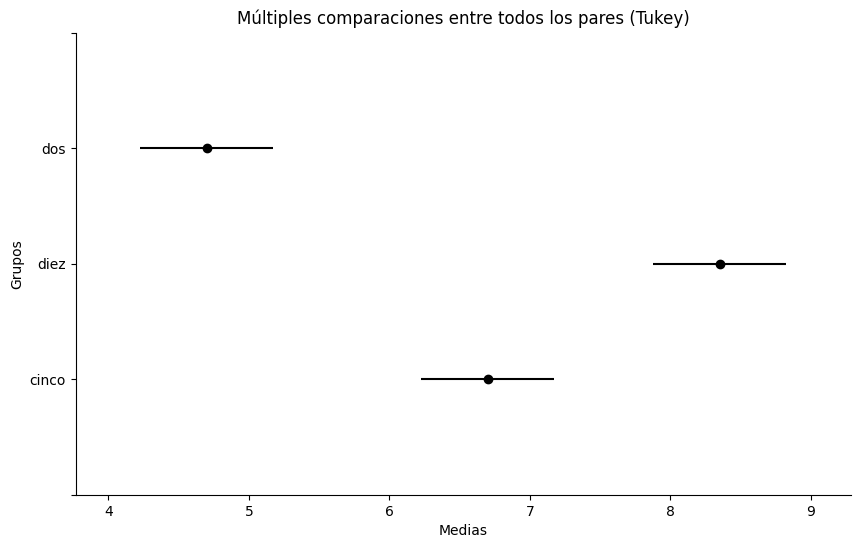

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Dureza'], groups=df['Porcentaje'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Este modelo cuenta con los supuestos de homocedasticidad, normalidad e independencia.  
Después de comprobar que estos supuestos son correctos, se realiza la prueba ANOVA, que confirma que hay diferencia significativa entre las variables. La prueba Tukey dio como resultado una diferencia significativa en todos los porcentajes de almidón, lo que se comprueba con el gráfico mostrado. Por lo tanto, se aconseja que, si se busca una dureza alta, se agregue un porcentaje igual de almidón.  

7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.
datos = '''
Niveles,Rendimientos
uno,14.823
uno,14.676
uno,14.720
uno,14.5141
uno,15.065
dos,25.151
dos,25.401
dos,25.131
dos,25.031
dos,25.267
tres,32.605
tres,32.460
tres,32.256
tres,32.669
tres,32.111
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.strip()
df

,Niveles,Rendimientos
0,uno,14.8230
1,uno,14.6760
2,uno,14.7200
3,uno,14.5141
4,uno,15.0650
5,dos,25.1510
6,dos,25.4010
7,dos,25.1310
8,dos,25.0310
9,dos,25.2670


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Niveles'] == 'uno']['Rendimientos'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Niveles'] == 'dos']['Rendimientos'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Niveles'] == 'tres']['Rendimientos'], "Grupo C", nivel_de_significancia)




Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9710
Valor p: 0.8819
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9647
Valor p: 0.8402
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9406
Valor p: 0.6701
Interpretación: Los datos tienen una distribución normal.


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Niveles'] == 'uno']['Rendimientos'],
    df[df['Niveles'] == 'dos']['Rendimientos'],
    df[df['Niveles'] == 'tres']['Rendimientos'],
)
# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 0.8864989638874725
Valor p: 0.6419470329147967
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


La independencia en este modelo sí es existente, ya que, si se agrega un nivel de nitrógeno a algunas hectáreas de tierra y después se agrega un nivel mayor (o menor) a otras, ninguna será afectada.

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
      df[df['Niveles'] == 'uno']['Rendimientos'],
      df[df['Niveles'] == 'dos']['Rendimientos'],
      df[df['Niveles'] == 'tres']['Rendimientos'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 10131.62
Valor p: 4.298249543847106e-20

Conclusión: Hay diferencias significativas entre al menos dos grupos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   dos   tres    7.224   0.0   6.8912   7.5568   True
   dos    uno -10.4366   0.0 -10.7694 -10.1038   True
  tres    uno -17.6606   0.0 -17.9934 -17.3278   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

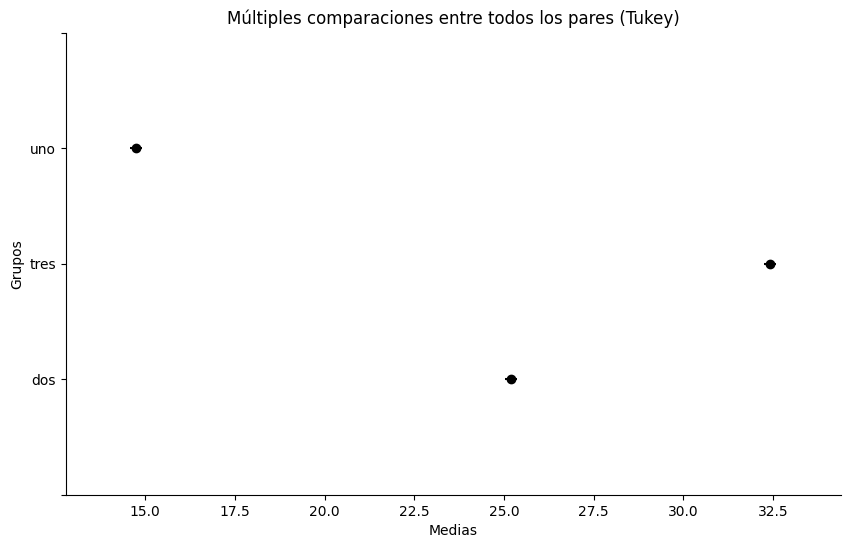

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Rendimientos'], groups=df['Niveles'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

El modelo cuenta con los supuestos de homocedasticidad, normalidad e independencia. Después de comprobar que estos supuestos son correctos, se realiza la prueba ANOVA, que confirma que hay diferencia significativa entre las variables.

La prueba Tukey dio como resultado una diferencia significativa en los tres niveles de fertilizante con nitrógeno, lo que se comprueba con el gráfico mostrado. Por lo tanto, se aconseja utilizar el nivel dos de fertilización, pues el nivel uno da un rendimiento menor, pero al utilizar un alto nivel de fertilización (nivel 3) puede ser perjudicial.

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.
datos = '''
Aglutinante,Porcentaje
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
GRE,0.289
GRE,0.275
GRE,0.612
GRE,0.152
GRE,0.137
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.strip()
df

,Aglutinante,Porcentaje
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Aglutinante'] == 'PVP']['Porcentaje'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Aglutinante'] == 'CMC']['Porcentaje'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Aglutinante'] == 'GRE']['Porcentaje'], "Grupo C", nivel_de_significancia)


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9147
Valor p: 0.4962
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9679
Valor p: 0.8616
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.8313
Valor p: 0.1424
Interpretación: Los datos tienen una distribución normal.


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Aglutinante'] == 'PVP']['Porcentaje'],
    df[df['Aglutinante'] == 'CMC']['Porcentaje'],
    df[df['Aglutinante'] == 'GRE']['Porcentaje'],
)
# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 0.24372837838984224
Valor p: 0.8852685893786298
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


Se puede observar que existe independencia entre las variables, ya que el tipo de aglutinante no afecta el porcentaje de friabilidad.

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
      df[df['Aglutinante'] == 'PVP']['Porcentaje'],
      df[df['Aglutinante'] == 'CMC']['Porcentaje'],
      df[df['Aglutinante'] == 'GRE']['Porcentaje'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 4420.97
Valor p: 6.1982130531024296e-18

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    GRE   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   GRE    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

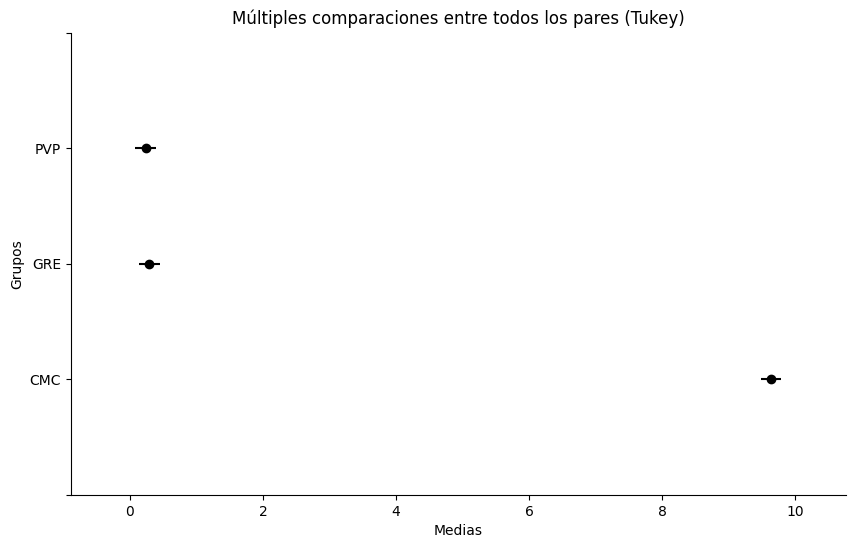

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Porcentaje'], groups=df['Aglutinante'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Después de analizar el diseño experimental, se logran realizar las pruebas necesarias, obteniendo como resultado que el diseño sí cuenta con homocedasticidad, normalidad e independencia.

Sin embargo, la prueba ANOVA indica que existe una diferencia significativa en al menos dos métodos. Después de realizar la prueba Tukey, se logra observar que la carboximetilcelulosa sódica tiene una diferencia significativa al compararla con los demás aglutinantes. Es por eso que se recomienda no utilizar el material ya mencionado, pues, como se observa en la gráfica obtenida, el CMC tiene más tendencia a desintegrarse (más porcentaje de friabilidad).

Por otro lado, el PVP y GRE son los más recomendados, porque estos cuentan con el mismo nivel de friabilidad.

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.
datos = '''
Clona,Porcentaje
uno,8.69
uno,6.68
uno,6.83
uno,6.43
uno,10.30
dos,8.00
dos,16.41
dos,12.43
dos,10.99
dos,15.53
tres,17.39
tres,13.73
tres,15.62
tres,17.05
tres,15.42
cuatro,10.37
cuatro,9.16
cuatro,8.83
cuatro,4.40
cuatro,10.38
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.strip()
df

,Clona,Porcentaje
0,uno,8.69
1,uno,6.68
2,uno,6.83
3,uno,6.43
4,uno,10.30
5,dos,8.00
6,dos,16.41
7,dos,12.43
8,dos,10.99
9,dos,15.53


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Clona'] == 'uno']['Porcentaje'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Clona'] == 'dos']['Porcentaje'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Clona'] == 'tres']['Porcentaje'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Clona'] == 'cuatro']['Porcentaje'], "Grupo D", nivel_de_significancia)


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.8411
Valor p: 0.1679
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9539
Valor p: 0.7648
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9348
Valor p: 0.6293
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.7772
Valor p: 0.0522
Interpretación: Los datos tienen una distribución normal.


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Clona'] == 'uno']['Porcentaje'],
    df[df['Clona'] == 'dos']['Porcentaje'],
    df[df['Clona'] == 'tres']['Porcentaje'],
    df[df['Clona'] == 'cuatro']['Porcentaje'],
)
# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 3.2573646373855567
Valor p: 0.3536209118873371
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


Se acepta la existencia de independencia entre las variables, ya que, si se cultiva (por ejemplo) el tipo "1" de clona, su respuesta no será afectada por el cultivo del tipo "2".

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
      df[df['Clona'] == 'uno']['Porcentaje'],
      df[df['Clona'] == 'dos']['Porcentaje'],
      df[df['Clona'] == 'tres']['Porcentaje'],
      df[df['Clona'] == 'cuatro']['Porcentaje'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 12.33
Valor p: 0.00019750046667234793

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
cuatro    dos    4.044 0.0699  -0.267  8.355  False
cuatro   tres    7.214  0.001   2.903 11.525   True
cuatro    uno   -0.842 0.9428  -5.153  3.469  False
   dos   tres     3.17 0.1939  -1.141  7.481  False
   dos    uno   -4.886 0.0237  -9.197 -0.575   True
  tres    uno   -8.056 0.0003 -12.367 -3.745   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

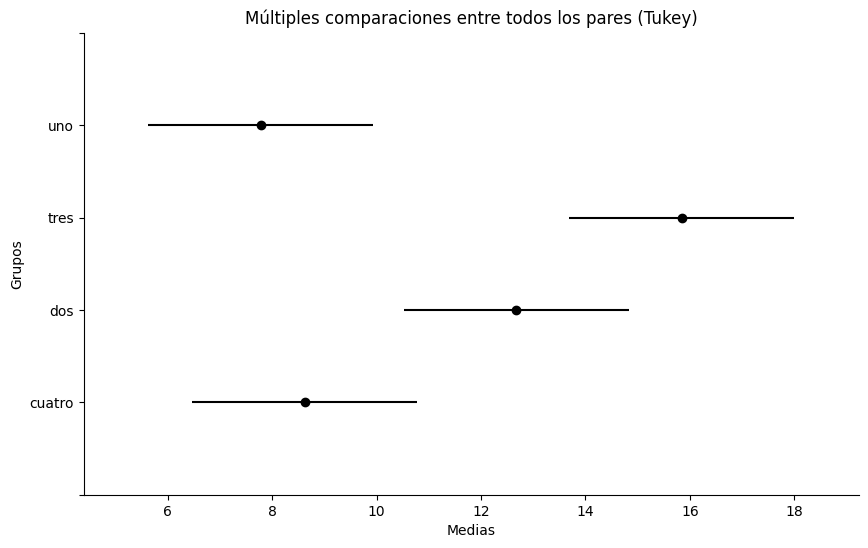

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Porcentaje'], groups=df['Clona'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Después de realizar pruebas y que el modelo cumpliera con homocedasticidad, normalidad e independencia, la prueba ANOVA arrojó que existe una diferencia entre al menos dos grupos, para después confirmar dicho resultado con la prueba Tukey, donde la tabla confirma lo ya planteado. En el gráfico se muestra que todos los tipos de clonas tienen un porcentaje diferente.

Así que se recomienda cultivar el tipo de clona 3, ya que este tiene un porcentaje de azúcares reductores mayor, es decir, responde de mejor manera.

10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.
datos = '''
Tratamiento,Porcentaje
Con,5.30
Con,4.03
Con,4.00
Con,2.56
Con,5.06
Con,4.06
Con,2.08
Con,4.03
Con,2.04
Con,1.18
Sin,8.02
Sin,13.18
Sin,7.15
Sin,9.11
Sin,8.23
Sin,16.3
Sin,9.20
Sin,6.35
Sin,7.15
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.strip()
df

,Tratamiento,Porcentaje
0,Con,5.30
1,Con,4.03
2,Con,4.00
3,Con,2.56
4,Con,5.06
5,Con,4.06
6,Con,2.08
7,Con,4.03
8,Con,2.04
9,Con,1.18


In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Tratamiento'] == 'Con']['Porcentaje'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'Sin']['Porcentaje'], "Grupo B", nivel_de_significancia)



Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9149
Valor p: 0.3162
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.8176
Valor p: 0.0323
Interpretación: Los datos no tienen una distribución normal.


Se observa independencia entre la producción que cuenta con el tratamiento de limpieza y la que no cuenta con este, ya que el lote realizado con el tratamiento no afecta en el porcentaje de CD’s con cometas del lote realizado sin el tratamiento y viceversa.

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Si al menos un grupo no sigue una distribución normal
from scipy.stats import kruskal

# Prueba de Kruskal-Wallis
kruskal_result = kruskal(
    df[df['Tratamiento'] == 'Con']['Porcentaje'],
    df[df['Tratamiento'] == 'Sin']['Porcentaje'],
)

# Mostrar resultados
print("Resultados de la prueba de Kruskal-Wallis:")
print(f"Estadístico de prueba: {kruskal_result.statistic:.2f}")
print(f"Valor p: {kruskal_result.pvalue:.4f}")

# Interpretación
if kruskal_result.pvalue < 0.05:
    print("\nInterpretación: Existen diferencias significativas entre al menos dos grupos.")
else:
    print("\nInterpretación: No hay diferencias significativas entre los grupos.")


Resultados de la prueba de Kruskal-Wallis:
Estadístico de prueba: 13.52
Valor p: 0.0002

Interpretación: Existen diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   Con    Sin    5.976 0.0001 3.6027 8.3493   True
--------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

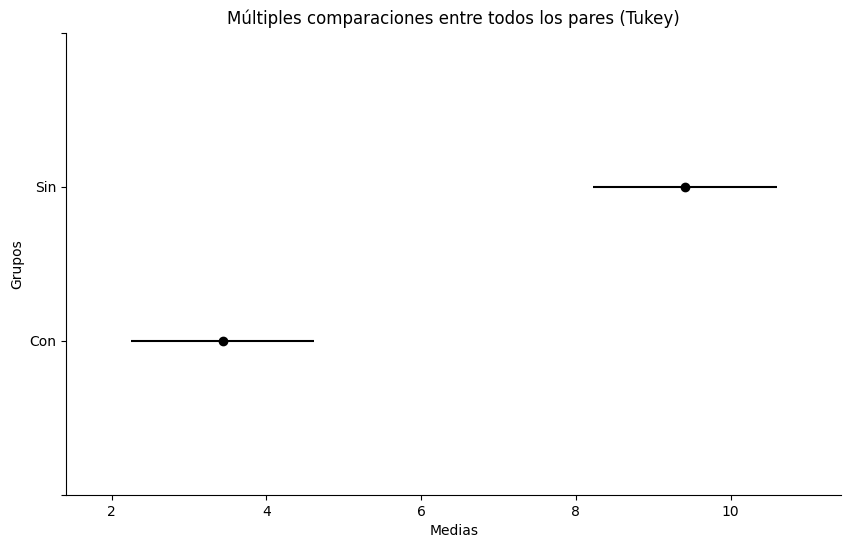

In [ ]:
#Daniela Montserrat Robledo Ruvalcaba
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Porcentaje'], groups=df['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

En el análisis realizado con la prueba de homocedasticidad, se indica que al menos los datos de una variable no cuentan con una distribución normal. Es por eso que se omite hacer la prueba de Bartlett y, en lugar de ANOVA, se utiliza la prueba de Kruskal-Wallis. Dicha prueba arroja como resultado que al menos dos grupos cuentan con diferencias significativas. Es por eso que, como paso siguiente, la prueba de Tukey explica que el lote con tratamiento de limpieza cuenta con menos porcentaje de CD's con cometas, mientras que el lote que no cuenta con el tratamiento arroja más CD's defectuosos.

Es por eso que se aconseja aplicar el tratamiento de limpieza a la producción.